In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
sns.set_theme(color_codes=True)

In [60]:
#import dataset
os.chdir('C:\\Users\\91630\\Downloads\\Jupyter\\portfolio')
df = pd.read_csv('Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [61]:
df.columns = ['ProductID','Weight','FatContent','ProductVisibility','ProductType','MRP',\
                'OutletID','EstablishmentYear','OutletSize','LocationType','OutletType','OutletSales']

In [4]:
df.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Preprocessing part 1

In [5]:
#check ther number of unique values
df.select_dtypes(include='object').nunique()

ProductID       1559
FatContent         5
ProductType       16
OutletID          10
OutletSize         3
LocationType       3
OutletType         4
dtype: int64

In [6]:
#drop ProductId because it is unnecessary
df.drop(columns='ProductID', inplace=True)
df.head()

,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Exploratory Data Analysis

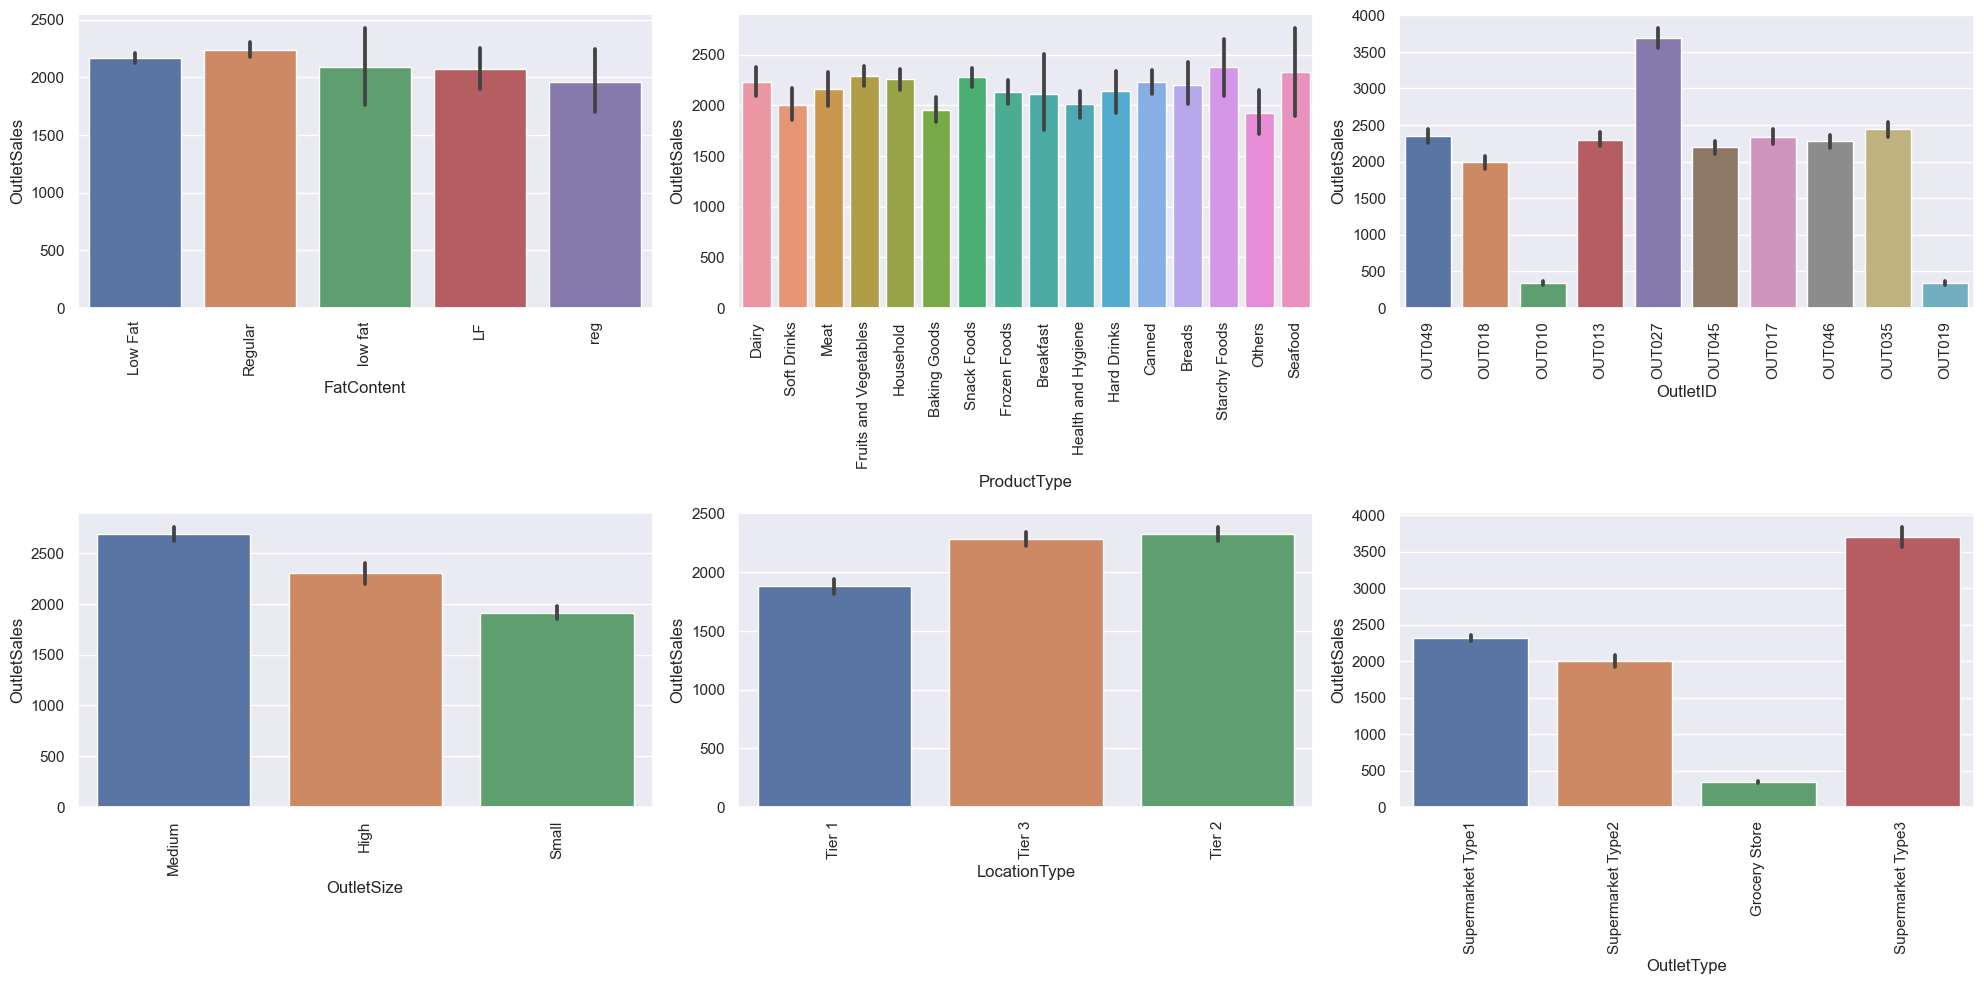

In [7]:
#List of categorical variables to plot
cat_vars = ['FatContent', 'ProductType', 'OutletID', 'OutletSize', 'LocationType', 
            'OutletType']

#create figure with subplots 
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

#create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='OutletSales', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
    
#adjust spacing between subplots
fig.tight_layout()

#show plot
plt.show()

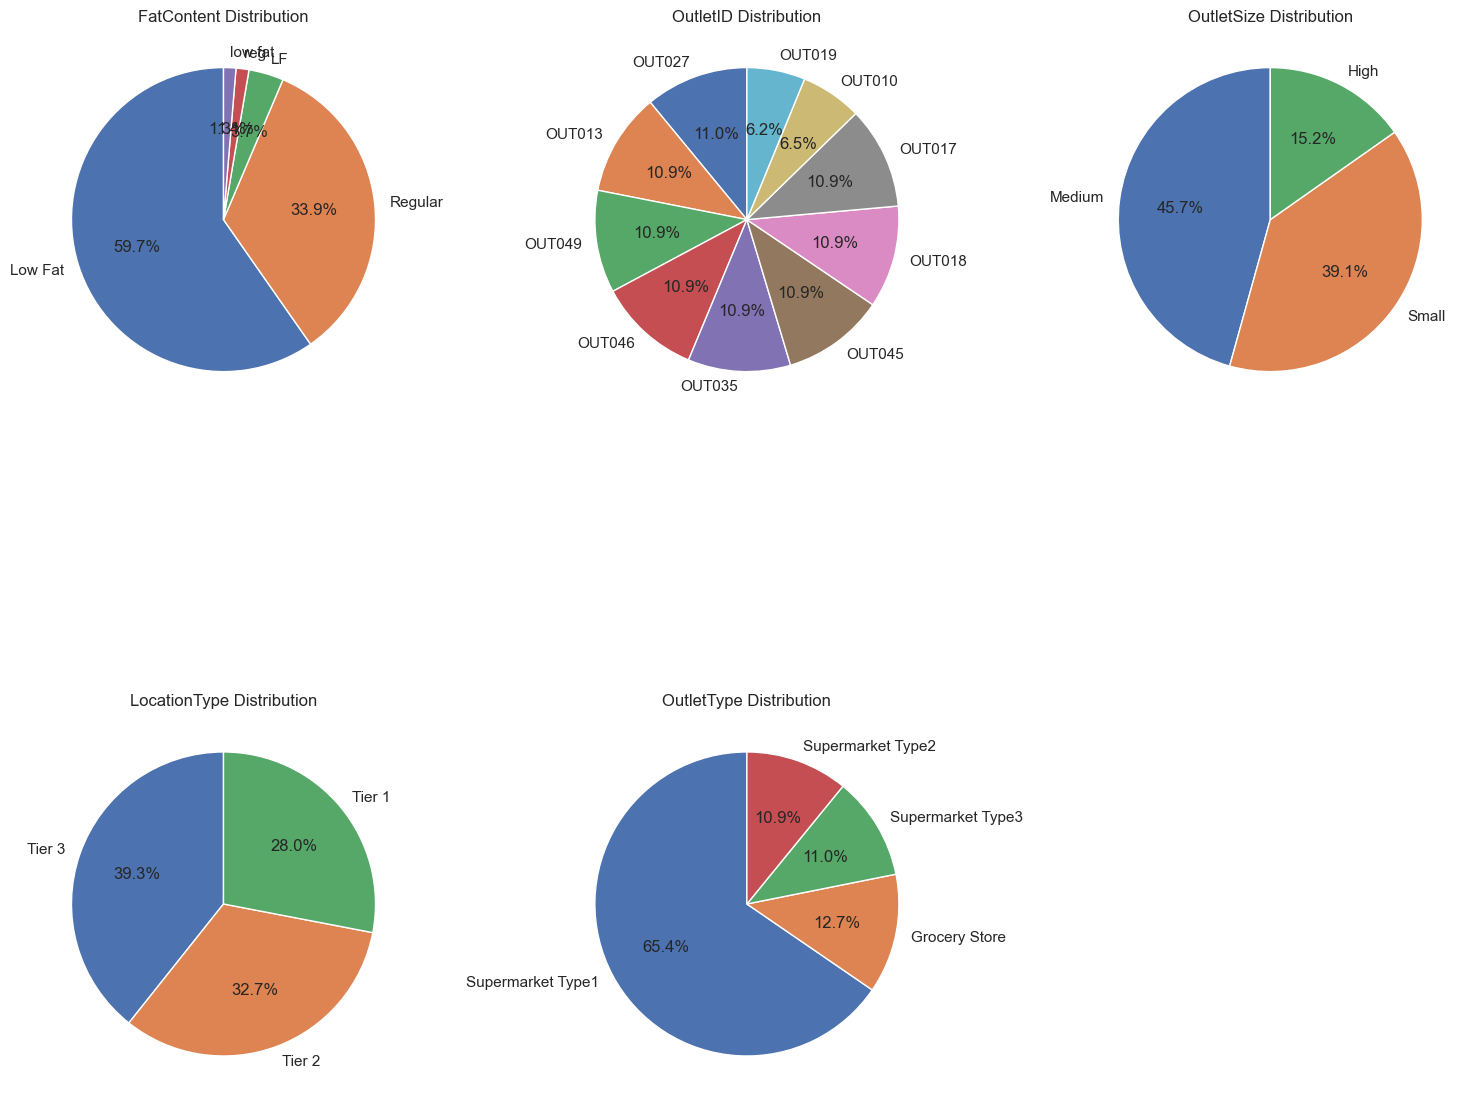

In [8]:
cat_vars = ['FatContent', 'OutletID', 'OutletSize', 'LocationType', 
           'OutletType']

#create a figure and axes 
fig, axs  =plt.subplots(nrows=2, ncols=3, figsize=(15,15))

#create a pie chart for each categorical value
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        #count the number of occurrences for each category
        cat_counts = df[var].value_counts()
        
        #create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
        
        #set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')
        
#adjust spacing between subplots
fig.tight_layout()
fig.delaxes(axs[1][2])

#show the plot
plt.show()

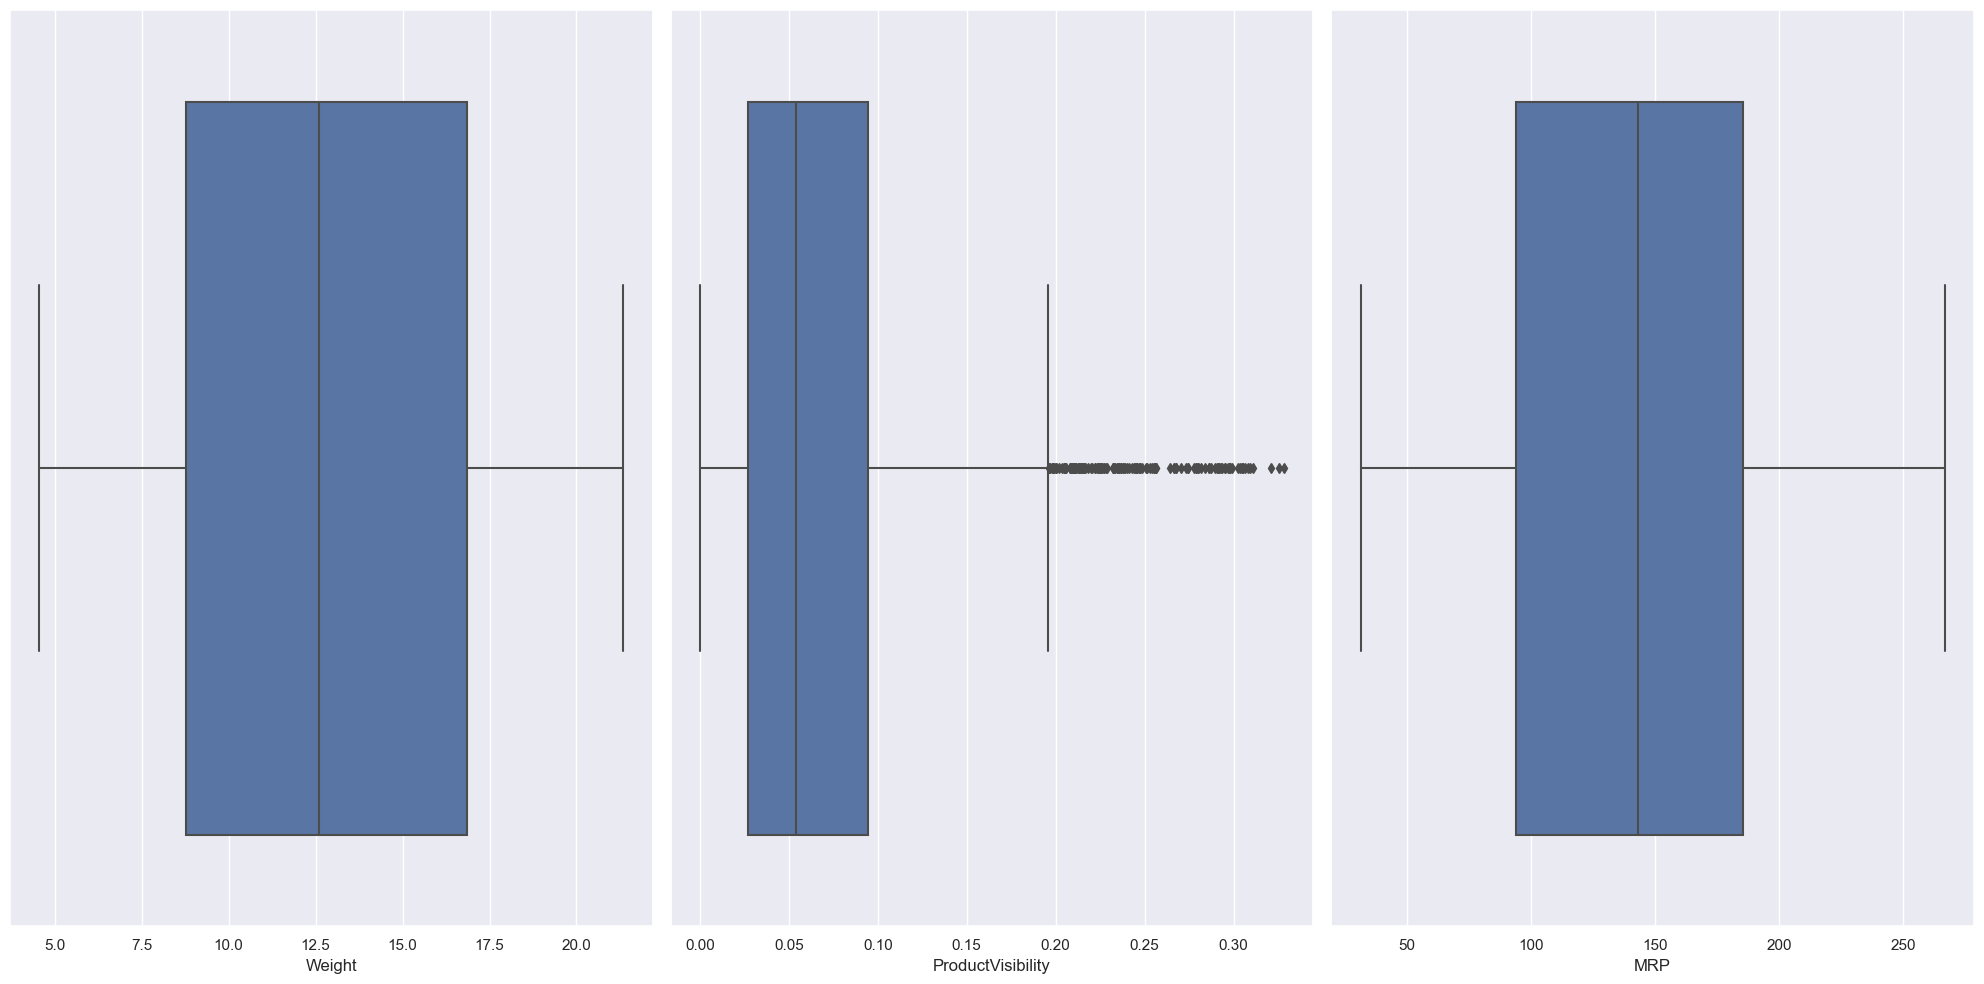

In [9]:
num_vars = ['Weight', 'ProductVisibility', 'MRP']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])
    
fig.tight_layout()    

plt.show()

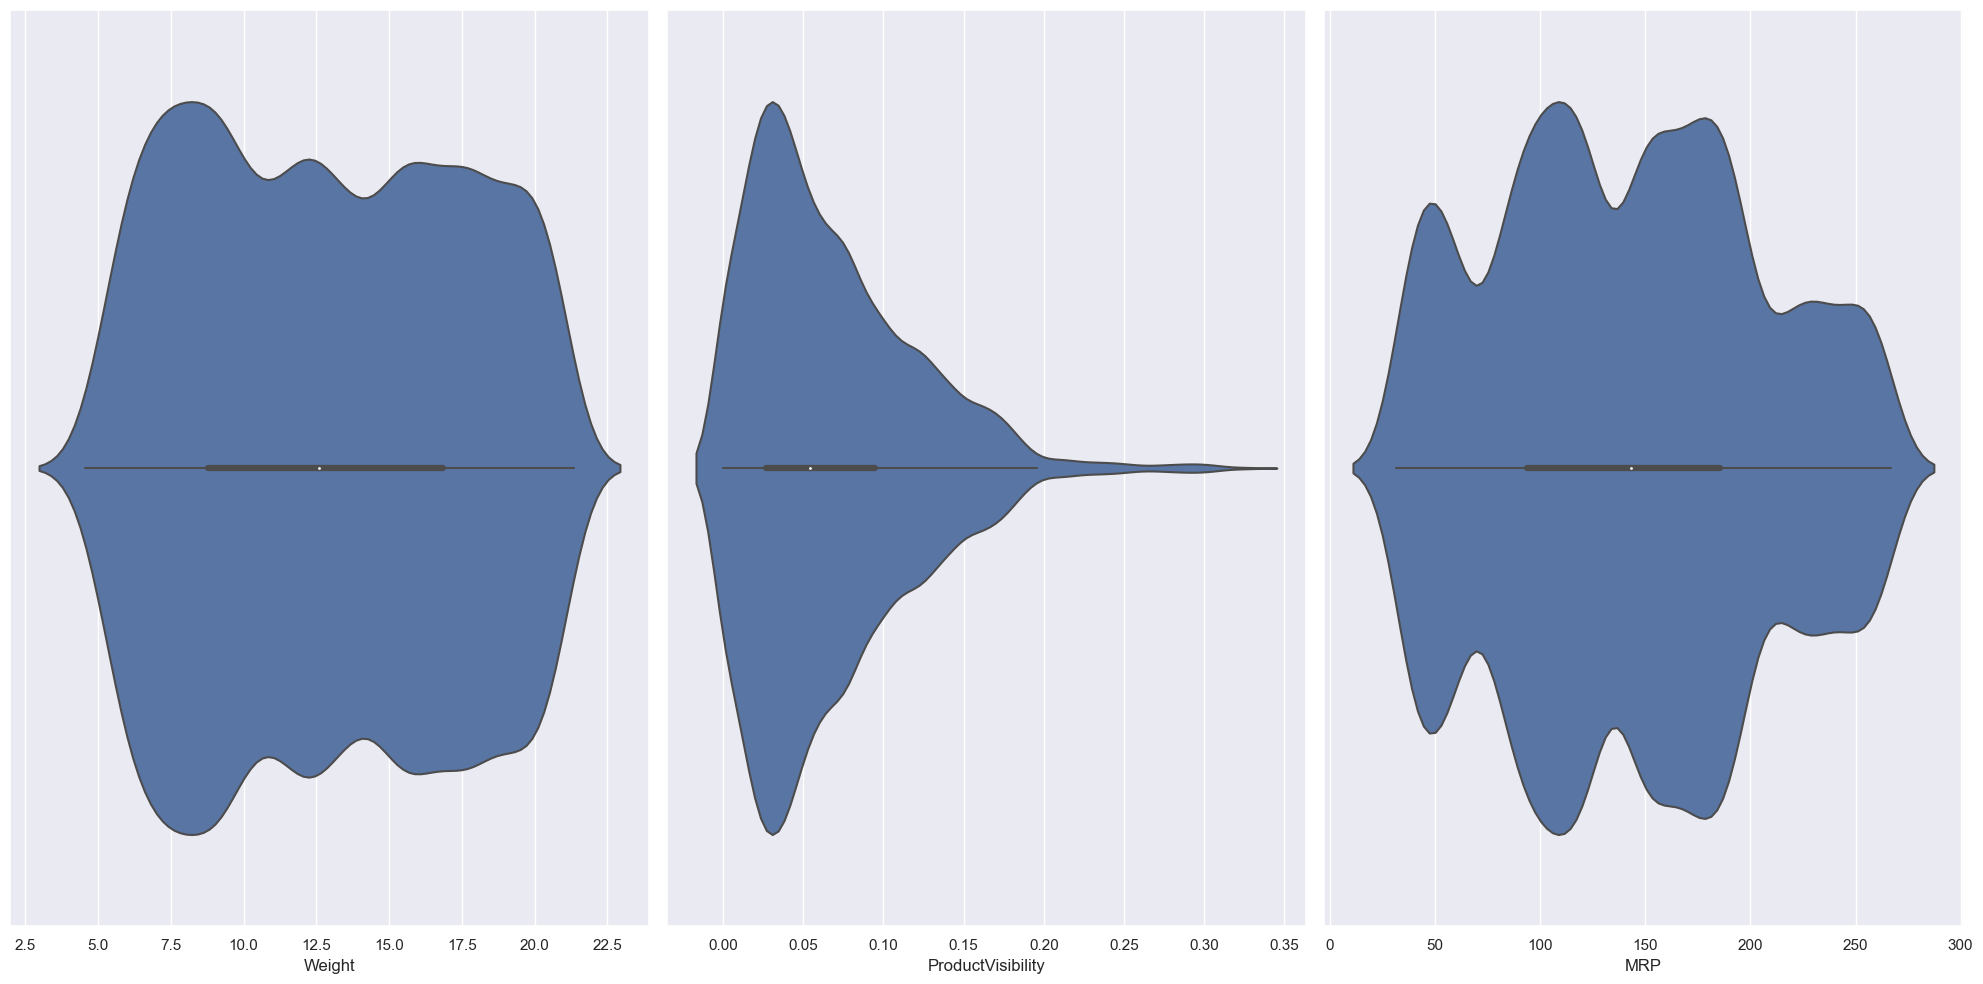

In [10]:
num_vars = ['Weight', 'ProductVisibility', 'MRP']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])
    
fig.tight_layout()    
plt.show()

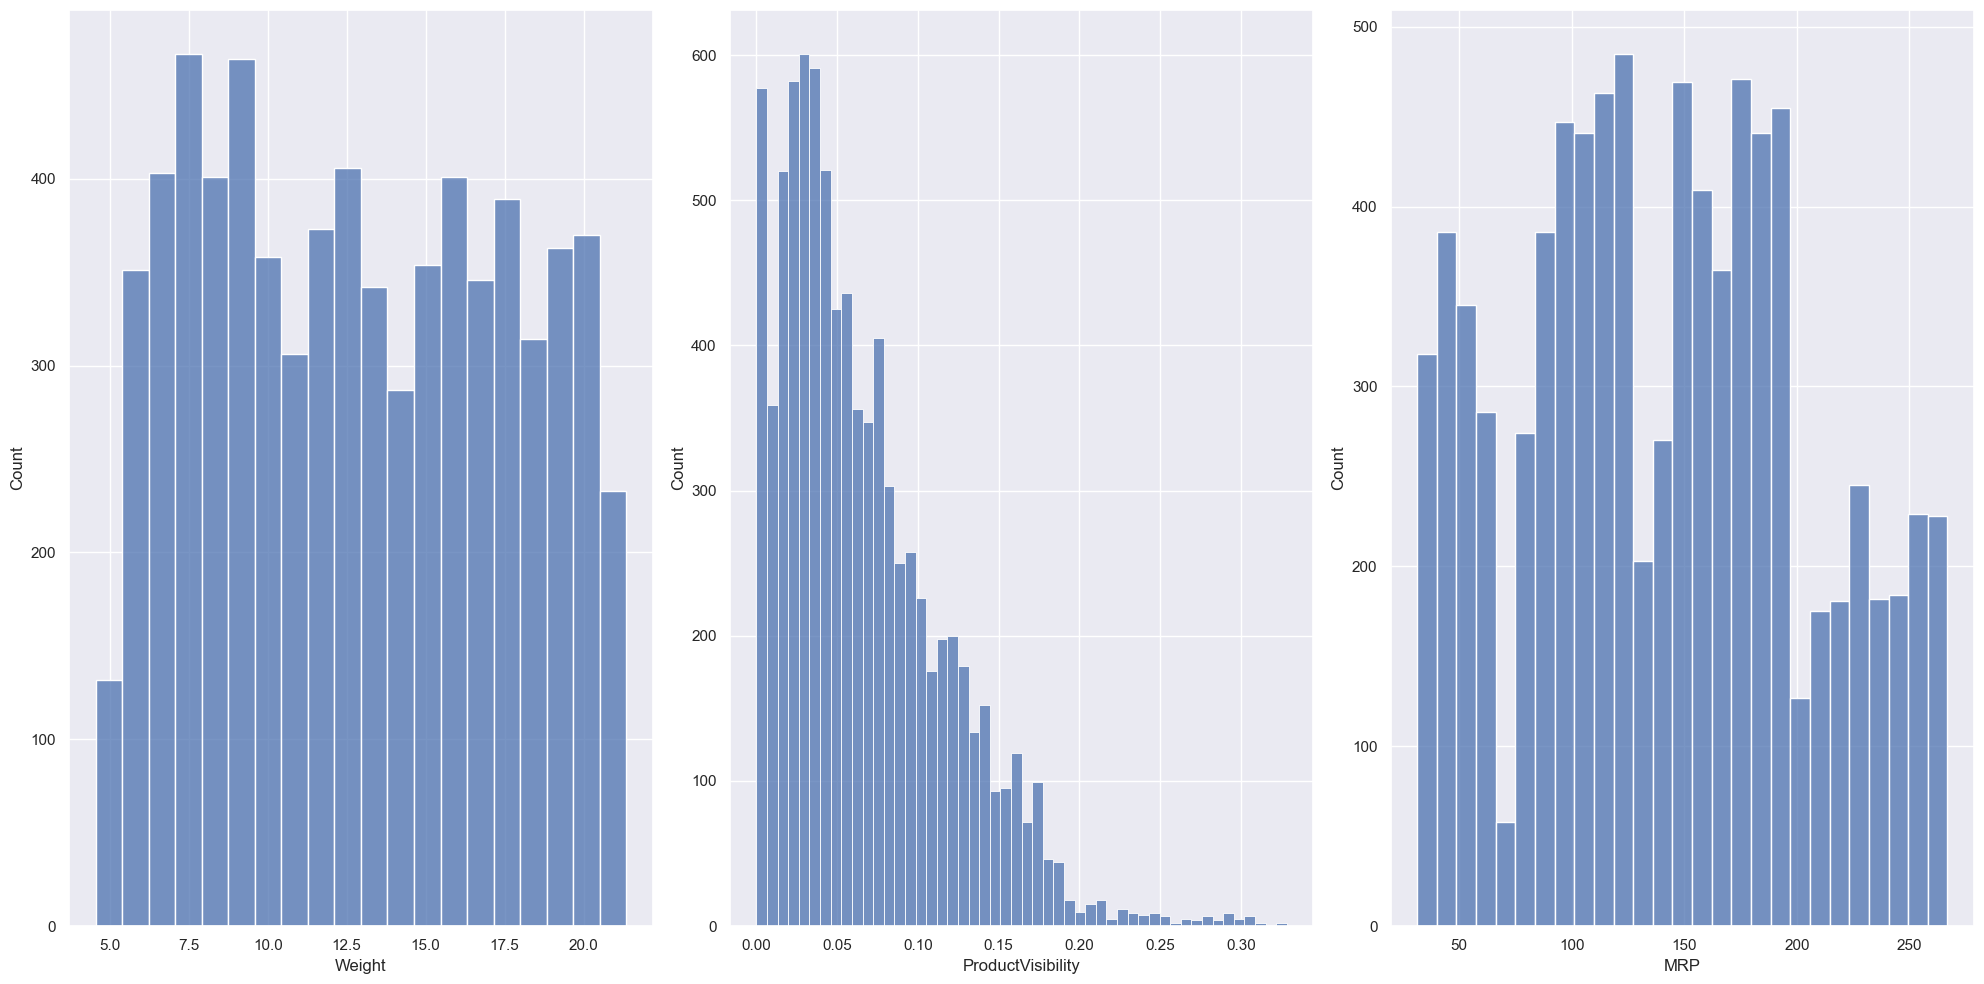

In [11]:
num_vars = ['Weight', 'ProductVisibility', 'MRP']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.histplot(x=var, data=df, ax=axs[i])
    
fig.tight_layout()    
plt.show()

<Axes: xlabel='EstablishmentYear', ylabel='OutletSales'>

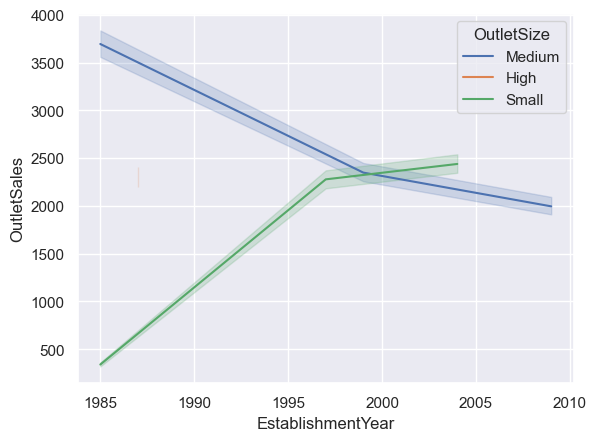

In [18]:
sns.lineplot(data=df, x="EstablishmentYear", y="OutletSales", hue="OutletSize")

<Axes: xlabel='EstablishmentYear', ylabel='OutletSales'>

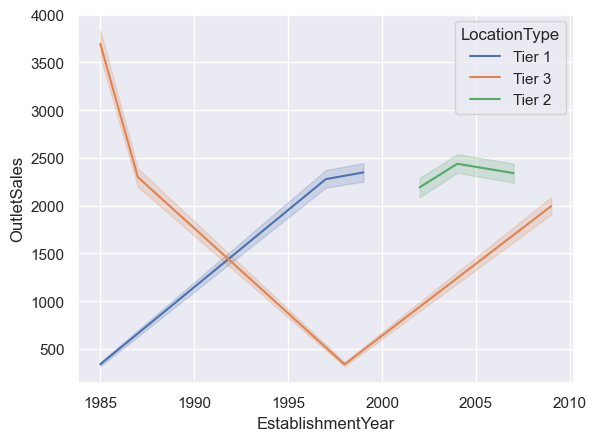

In [12]:
sns.lineplot(data=df, x="EstablishmentYear", y="OutletSales", hue="LocationType")

<Axes: xlabel='EstablishmentYear', ylabel='OutletSales'>

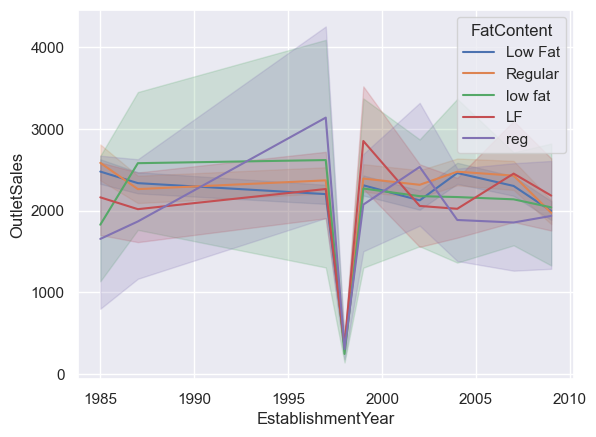

In [13]:
sns.lineplot(data=df, x="EstablishmentYear", y="OutletSales", hue="FatContent")

<Axes: xlabel='EstablishmentYear', ylabel='OutletSales'>

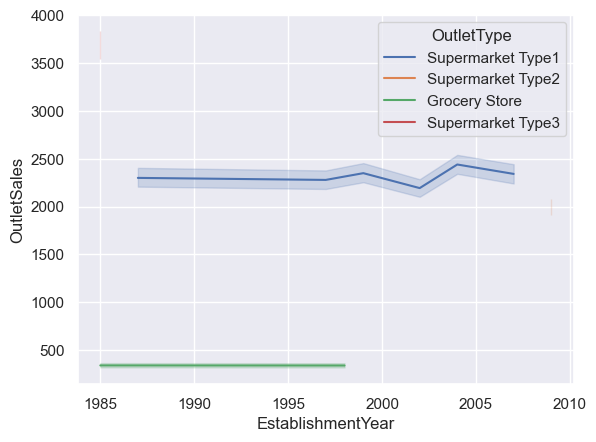

In [14]:
sns.lineplot(data=df, x="EstablishmentYear", y="OutletSales", hue="OutletType")

# Data Preprocessing part 2

In [15]:
#Check the missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

OutletSize    28.276428
Weight        17.165317
dtype: float64

In [16]:
df.shape

(8523, 11)

In [17]:
#fill the weight size with mean
df['Weight'] = df['Weight'].fillna(df['Weight'].mean())

In [18]:
unique_sizes_train3 = df.groupby('OutletType')['OutletSize'].unique()
unique_sizes_train3

OutletType
Grocery Store                      [nan, Small]
Supermarket Type1    [Medium, High, nan, Small]
Supermarket Type2                      [Medium]
Supermarket Type3                      [Medium]
Name: OutletSize, dtype: object

In [19]:
#fill null value in OutletSize where OutletType == Grocery Store with 'small' value
df.loc[(df['OutletType'] == 'Grocery Store') & (df['OutletSize'].isna()), 'OutletSize'] = 'Small'

In [20]:
#Check the missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

OutletSize    21.764637
dtype: float64

In [21]:
#drop 'OutletSize' null value row
df.dropna(subset=['OutletSize'], inplace=True)
df.shape

(6668, 11)

In [22]:
df.head()

,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Label encoding for each object data type

In [23]:
#Loop over each column in the dataframe where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    #print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

FatContent: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
ProductType: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Breakfast' 'Health and Hygiene'
 'Hard Drinks' 'Frozen Foods' 'Canned' 'Starchy Foods' 'Others' 'Breads'
 'Seafood']
OutletID: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT046' 'OUT035' 'OUT019']
OutletSize: ['Medium' 'Small' 'High']
LocationType: ['Tier 1' 'Tier 3' 'Tier 2']
OutletType: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [24]:
from sklearn import preprocessing

#Loop over each column in the data frame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    #Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    #Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    #Transform the column unsing the encoder
    df[col] = label_encoder.transform(df[col])
    
    #print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

FatContent: [1 2 3 0 4]
ProductType: [ 4 14 10  6  9  0 13  2  8  7  5  3 15 11  1 12]
OutletID: [7 2 0 1 4 6 5 3]
OutletSize: [1 2 0]
LocationType: [0 2 1]
OutletType: [1 2 0 3]


# Remove outlier using IQR

In [25]:
df.shape

(6668, 11)

In [26]:
#specify the columns to remove outliers from dataframe
column_names = ['ProductVisibility']

#remove outliers for each selected column using the IQR method
for column_name in column_names:
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[column_name] < (Q1  - 1.5 * IQR)) | (df[column_name] > (Q3 + 1.5 * IQR)))]
    
df.head()    

,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,9.30,1,0.016047,4,249.8092,7,1999,1,0,1,3735.1380
1,5.92,2,0.019278,14,48.2692,2,2009,1,2,2,443.4228
2,17.50,1,0.016760,10,141.6180,7,1999,1,0,1,2097.2700
3,19.20,2,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [27]:
df.shape

(6535, 11)

# Heatmap Correlation

<Axes: >

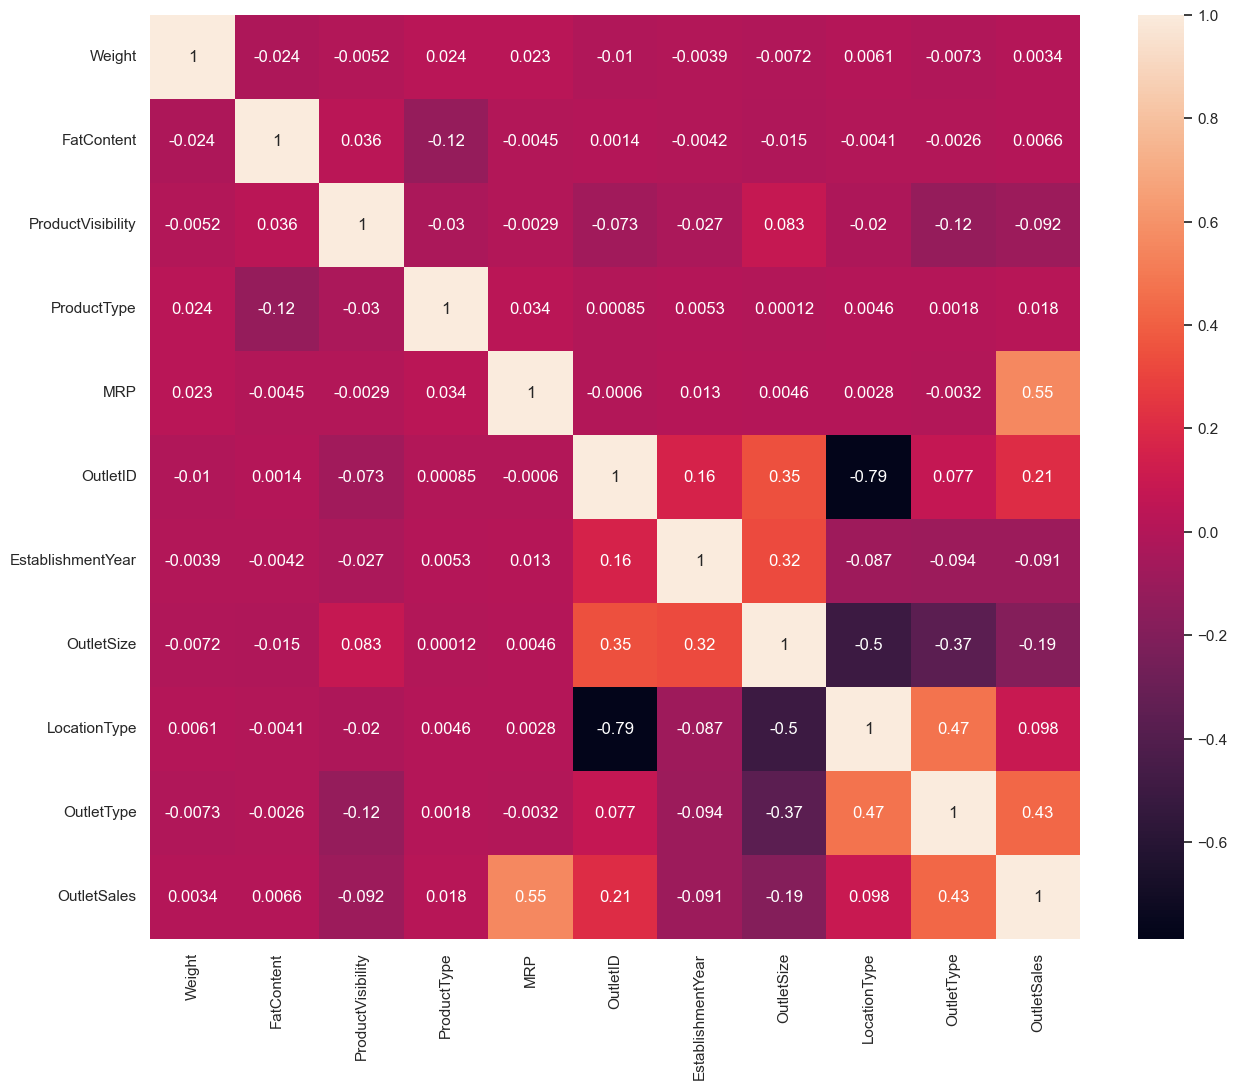

In [28]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

# Train Test Split 

In [29]:
x = df.drop('OutletSales', axis=1)
y = df['OutletSales']

In [30]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

# Decision Tree Regressor

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


# Create a DecisionTreeRegressor object
dtree = DecisionTreeRegressor()

# Define the hyperparameters to tune and their values
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

C:\Users\91630\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
320 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
320 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\91630\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91630\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\91630\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\91630\anaconda3\Lib\site-packag

{'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2}


In [38]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0, max_depth=6, max_features='sqrt', min_samples_leaf=4, min_samples_split=2)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, max_features='sqrt', min_samples_leaf=4,
                      random_state=0)

In [41]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred) 
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 0.5321625817758037
MAPE is 0.3141249725336564
MSE is 0.5326078049577935
R2 score is 0.593556047156538
RMSE score is 0.7297998389680512


(8523, 12)
(8523, 12)
(17046, 12)


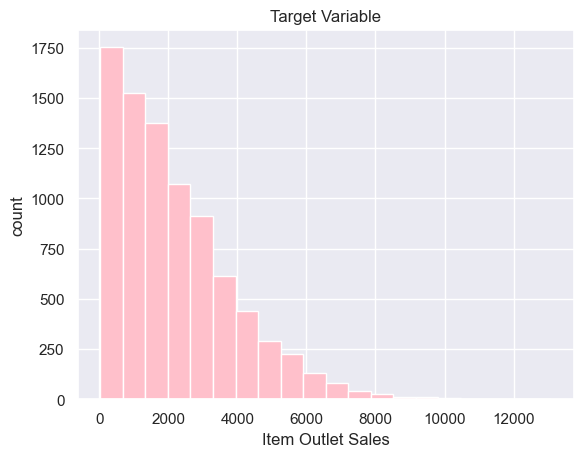

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


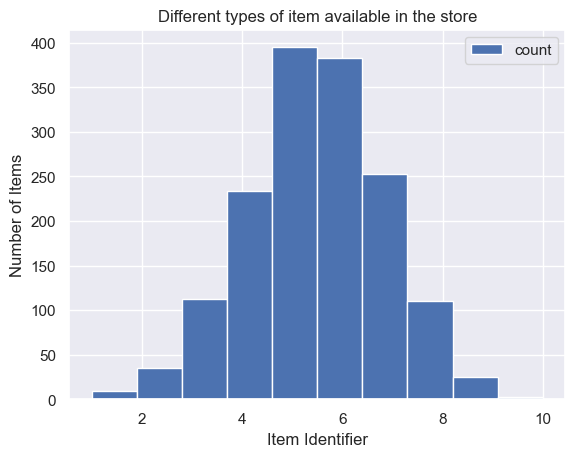

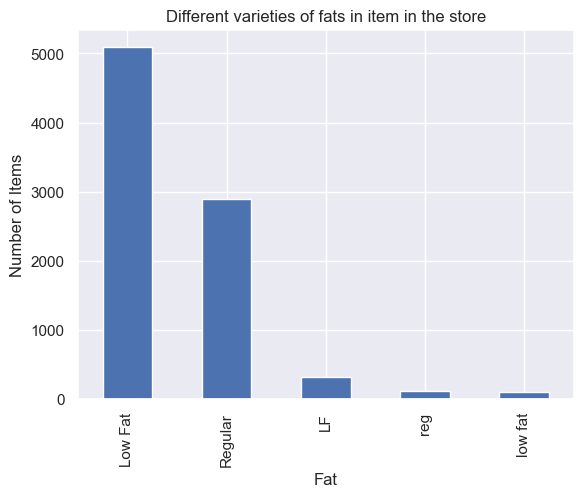

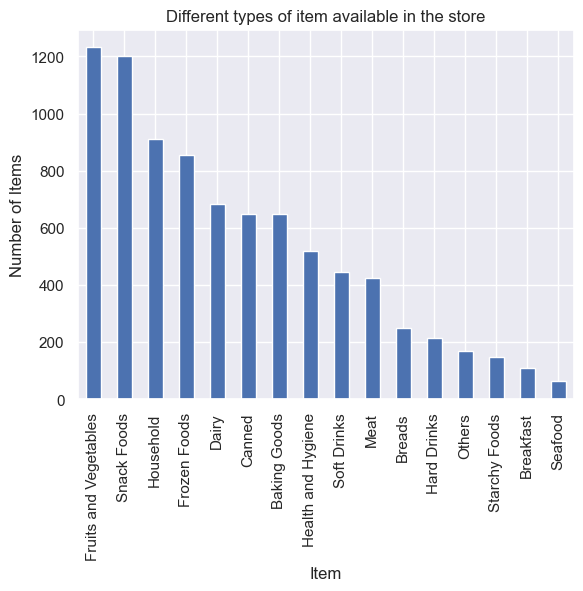

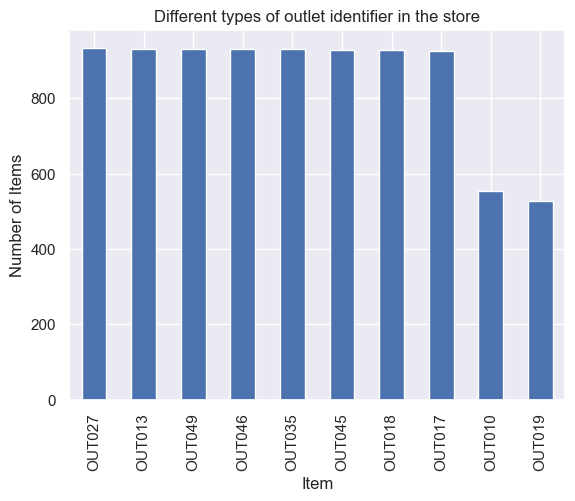

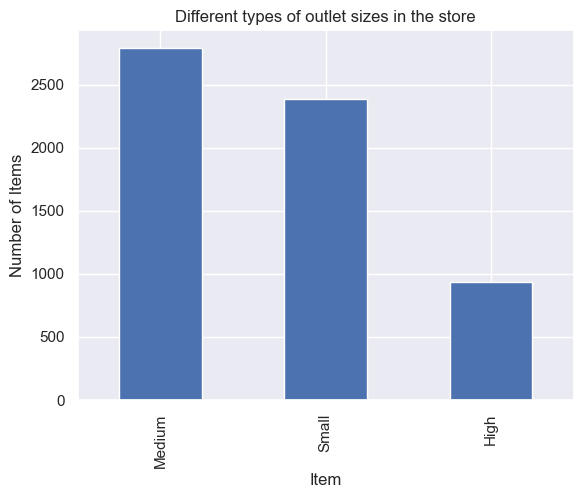

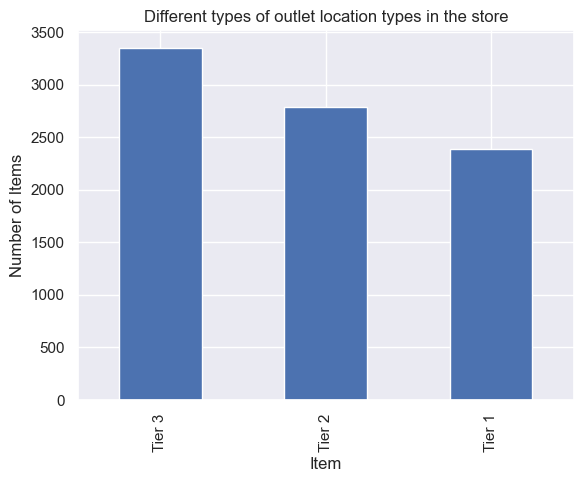

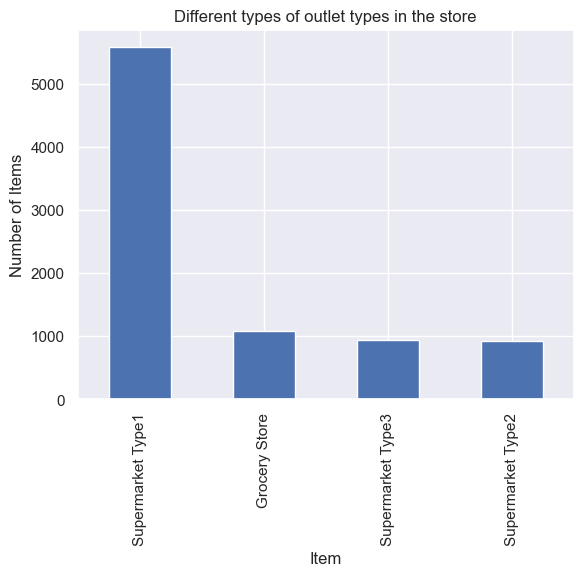

(17046, 47)
(17046, 46)
(17046,)
(8523, 47)
(8523, 47)
(5228, 10)
(16512,)
(1307, 10)
(4128,)
RMSE : 0.7297998389680512
Variance score: 0.59


ValueError: Found input variables with inconsistent numbers of samples: [5228, 16512]

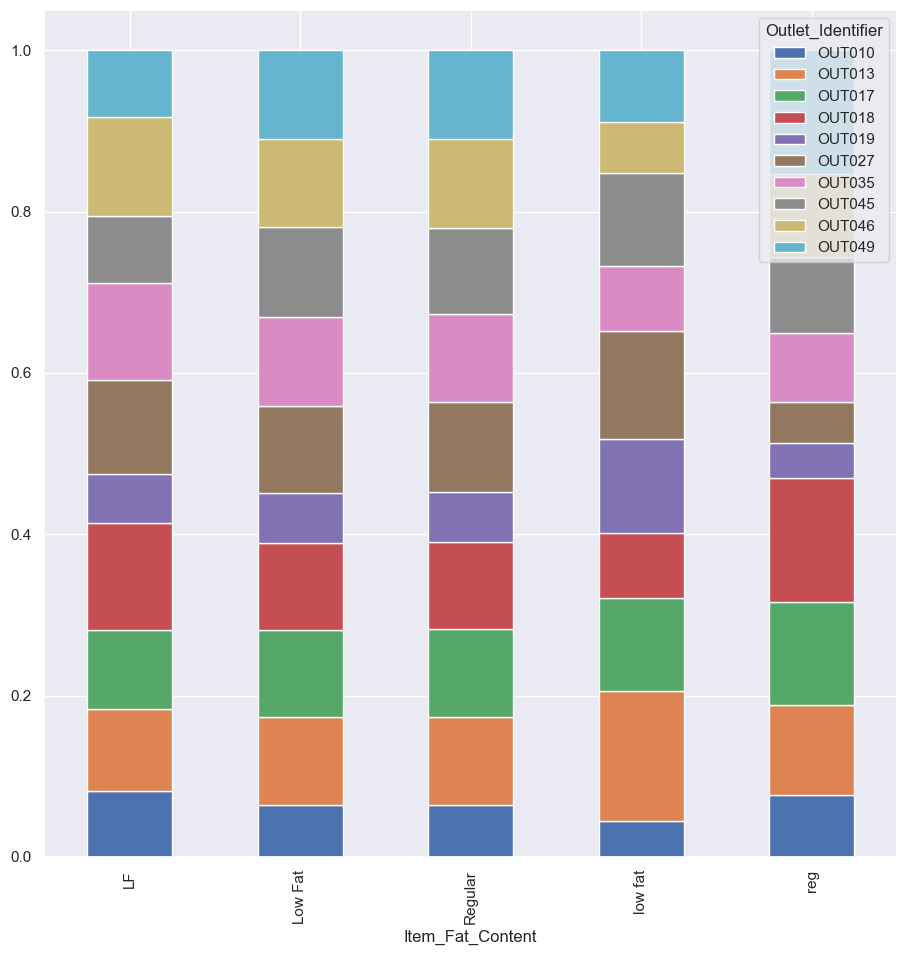

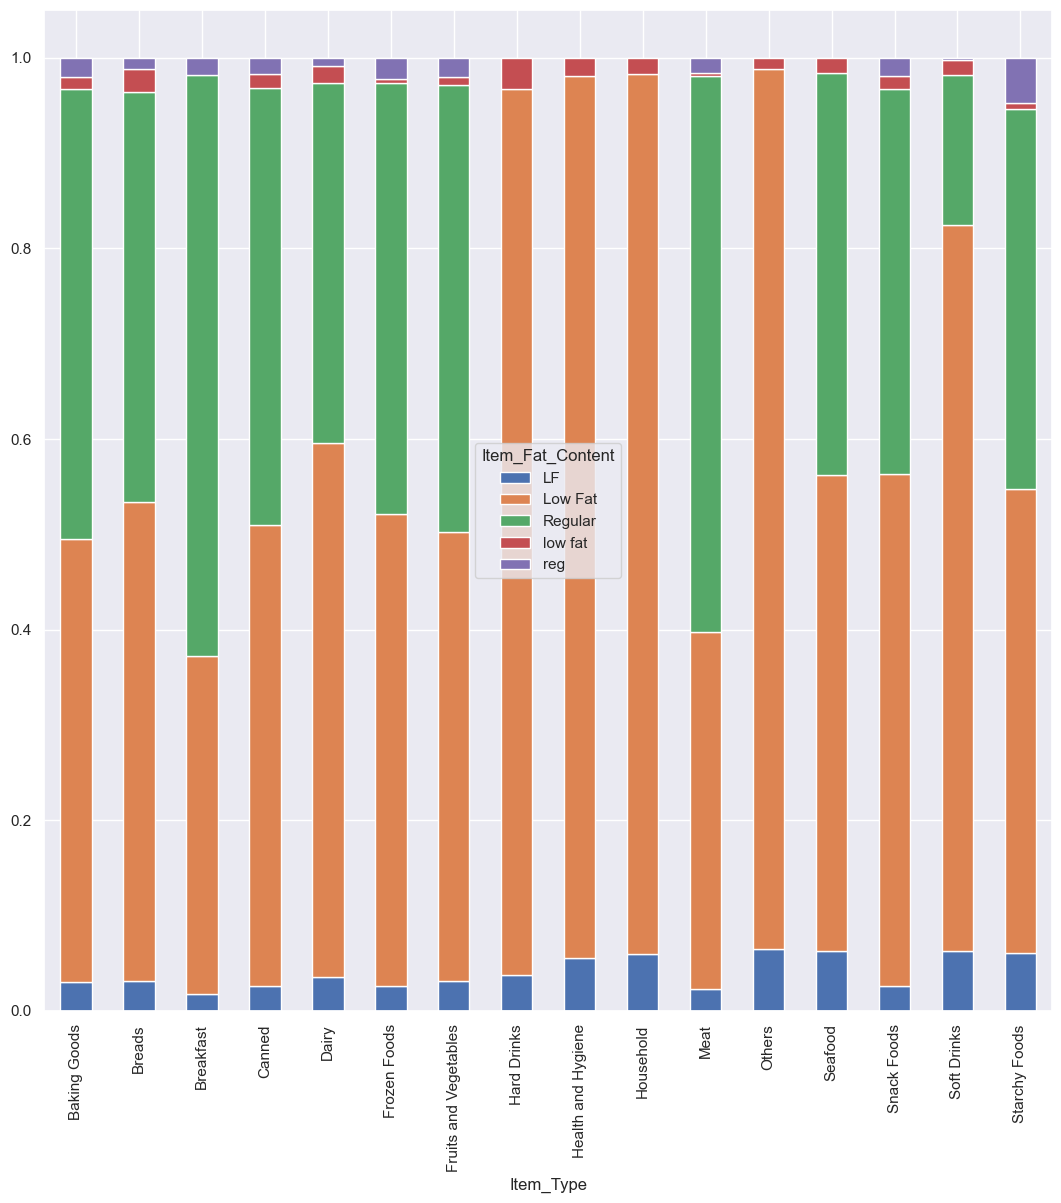

In [50]:
## Importing the libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Importing the datasets

train = pd.read_csv("Train.csv")
test = pd.read_csv("Train.csv")

# making copies of train and test dataset
train = train.copy()
test = test.copy()

train.head()

train.describe()

test.describe()

# Checking the shape of the training and testing datasets

print(train.shape)
print(test.shape)

# combining the train and test dataset

data = pd.concat([train, test])

print(data.shape)

## Data Visualization

## univariate data analysis

plt.hist(train['Item_Outlet_Sales'], bins = 20, color = 'pink')
plt.title('Target Variable')
plt.xlabel('Item Outlet Sales')
plt.ylabel('count')
plt.show()

# checking the columns of the train set

print(train.columns)

train.dtypes

# checking the different items in Item Idemtifier

train['Item_Identifier'].value_counts()

# we will analyze only the training set

train['Item_Identifier'].value_counts(normalize = True)
train['Item_Identifier'].value_counts().plot.hist()
plt.title('Different types of item available in the store')
plt.xlabel('Item Identifier')
plt.ylabel('Number of Items')
plt.legend()
plt.show()

# checking the different items in Item Fat Content

train['Item_Fat_Content'].value_counts()

# checking different varieties of item fat content

train['Item_Fat_Content'].value_counts(normalize = True)
train['Item_Fat_Content'].value_counts().plot.bar()
plt.title('Different varieties of fats in item in the store')
plt.xlabel('Fat')
plt.ylabel('Number of Items')
plt.show()

# checking the different items in Item Type

train['Item_Type'].value_counts()

# we will analyze only the training set

train['Item_Type'].value_counts(normalize = True)
train['Item_Type'].value_counts().plot.bar()
plt.title('Different types of item available in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

# checking the different types of Outlet Identifier

train['Outlet_Identifier'].value_counts()

# we will analyze only the training set

train['Outlet_Identifier'].value_counts(normalize = True)
train['Outlet_Identifier'].value_counts().plot.bar()
plt.title('Different types of outlet identifier in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

# checking the different types of Outlet Size

train['Outlet_Size'].value_counts()

# we will analyze only the training set

train['Outlet_Size'].value_counts(normalize = True)
train['Outlet_Size'].value_counts().plot.bar()
plt.title('Different types of outlet sizes in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

# checking different types of items in Outlet Location Type

train['Outlet_Location_Type'].value_counts()

# we will analyze only the training set

train['Outlet_Location_Type'].value_counts(normalize = True)
train['Outlet_Location_Type'].value_counts().plot.bar()
plt.title('Different types of outlet location types in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

# checking different types of item in Outlet Type

train['Outlet_Type'].value_counts()

# we will analyze only the training set

train['Outlet_Type'].value_counts(normalize = True)
train['Outlet_Type'].value_counts().plot.bar()
plt.title('Different types of outlet types in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

# fat content vs outlet identifier

Item_Fat_Content = pd.crosstab(train['Item_Fat_Content'],train['Outlet_Identifier'])
Item_Fat_Content.div(Item_Fat_Content.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(11, 11))

# fat content vs item type

Item_Type = pd.crosstab(train['Item_Type'], train['Item_Fat_Content'])
Item_Type.div(Item_Type.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(13, 13))

## data pre processing

# checking unique values in the columns of train dataset

data.apply(lambda x: len(x.unique()))

data.isnull().sum()

# imputing missing values

data['Item_Weight'] = data['Item_Weight'].replace(0, np.NaN)
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace = True)

data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace = True)

data['Item_Outlet_Sales'] = data['Item_Outlet_Sales'].replace(0, np.NaN)
data['Item_Outlet_Sales'].fillna(data['Item_Outlet_Sales'].mode()[0], inplace = True)

data.isnull().sum()

# combining reg, Regular and Low Fat, low fat and, LF


data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
data['Item_Fat_Content'].value_counts()

# Getting the first two characters of ID to separate them into different categories

data['Item_Identifier'] = data['Item_Identifier'].apply(lambda x: x[0:2])

data['Item_Identifier'] = data['Item_Identifier'].map({'FD':'Food', 'NC':'Non_Consumable', 'DR':'Drinks'})

data['Item_Identifier'].value_counts()

# determining the operation peroid of a time

data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].value_counts()

# removing unnecassary columns from the dataset

#data = data.drop('Item_Identifier', axis = 1)

#print(data.shape)

data['Outlet_Type'].value_counts()

# label encoding

from sklearn.preprocessing import LabelEncoder

data.apply(LabelEncoder().fit_transform)

# one hot encoding

data = pd.get_dummies(data)

print(data.shape)

# splitting the data into dependent and independent variables

x = data.drop('Item_Outlet_Sales', axis = 1)
y = data.Item_Outlet_Sales

print(x.shape)
print(y.shape)

# splitting the dataset into train and test

train = data.iloc[:8523,:]
test = data.iloc[8523:,:]

print(train.shape)
print(test.shape)

# making x_train, x_test, y_train, y_test


print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

## Modelling



# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print('RMSE :', np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

## AdaBoost Regressor

from sklearn.ensemble import AdaBoostRegressor

model= AdaBoostRegressor(n_estimators = 100)
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# RMSE
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))

## XgBoost Regressor

from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)
print(y_pred)

# Calculating the root mean squared error
print("RMSE :", np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))

## Random Forest Regression

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 100 , n_jobs = -1)
model.fit(x_train, y_train)

# predicting the  test set results
y_pred = model.predict(x_test)
print(y_pred)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print("RMSE :",np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print("Result :",model.score(x_train, y_train))

## Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)
print(y_pred)

print(" RMSE : " , np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))

## Support vector machine

from sklearn.svm import SVR

model = SVR()
model.fit(x_train, y_train)

# predicting the x test results
y_pred = model.predict(x_test)

# Calculating the RMSE Score
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))

## Neural Networks

import numpy as np

x_train = np.asmatrix(x_train)
x_test = np.asmatrix(x_test)
y_train = np.asmatrix(y_train.T)
y_test = np.asmatrix(y_test.T)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

import tensorflow as tf

D = x_train.shape[1]

# Creating the placeholders for storing the X and Y variables 
tf_X = tf.placeholder(tf.float32 , [None,D])
tf_Y = tf.placeholder(tf.float32 , [None,1])

# Layer 1 
W1 = tf.Variable(tf.random_normal([D, 20], stddev = 0.01))
b1 = tf.Variable(tf.zeros([20]))
Layer_1 = tf.nn.relu(tf.matmul(tf_X, W1) + b1)

# Layer 2 
W2 = tf.Variable(tf.random_normal([20, 15], stddev = 0.01))
b2 = tf.Variable(tf.zeros([15]))
Layer_2 = tf.nn.relu(tf.matmul(Layer_1, W2) + b2)

# Layer 3
W3 = tf.Variable(tf.random_normal([15, 10], stddev = 0.01))
b3 = tf.Variable(tf.zeros([10]))
Layer_3 = tf.nn.relu(tf.matmul(Layer_2, W3) + b3)

# Output layer
W4 = tf.Variable(tf.random_normal([10, 1] , stddev = 0.01))
b4 = tf.Variable(tf.zeros([1]))
output = tf.add(tf.matmul(Layer_3, W4) , b4)

# Defining our cost function which we have to reduce 
cost = tf.reduce_mean(tf.square(output - tf_Y))

# Defining the function for Gradient Descent 
train = tf.train.GradientDescentOptimizer(0.0001).minimize(cost)

with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    ctrain = []
    ctest = []
    for i in range(10000):
        sess.run(train,feed_dict ={tf_X :x_train ,tf_Y :y_train})

        ctrain.append(sess.run(cost, feed_dict={tf_X :x_train, tf_Y :y_train}))
        ctest.append(sess.run(cost, feed_dict={tf_X :x_test, tf_Y :y_test}))
        print('Epoch :',i,'Cost :',ctrain[i])
        

# visualization of training data
plt.plot(ctrain)
plt.title(" Training Costs vs Epochs ")
plt.xlabel(" Epochs ")
plt.ylabel(" Costs ")
plt.show()

# visualization of testing data
plt.plot(ctest)
plt.title(" Testing Costs vs Epochs ")
plt.xlabel(" Epochs ")
plt.ylabel(" Costs ")
plt.show()